<a href="https://colab.research.google.com/github/bluecontainer/maddypython/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Functions that generate data for analysis in later cells

In [137]:
import numpy as np
import random
import pandas as pd
from functools import partial

def calc_nextvalue(oldvalue):
    r = (random.random()/10) - 0.05
    return (1 + r)*oldvalue + 10

def calc_newvalue(oldvalue, i):
    return calc_nextvalue(oldvalue)

def calc_newvaluewithinit(init, oldvalue, i):
    if oldvalue == 0:
        oldvalue = init
    return calc_newvalue(oldvalue, i)

def calc_investmentperiod(period):
    months = np.arange(period - 1)
    calc = np.frompyfunc(partial(calc_newvaluewithinit, 1000), 2, 1)
    result = calc.accumulate(months)
    return pd.DataFrame(data=result, columns=['portfoliovalue'])

def calc_lastinvestmentperiod(period, iteration):
    return calc_investmentperiod(period).tail(1).values[0][0]

def get_investmentfirstdoubled(df):
    dfDoubled = df[(df['portfoliovalue'] > 2000)]
    return dfDoubled.index.values[0] if dfDoubled.size > 0 else None

def get_lastinvestmentvalue(df):
    return df.tail(1).values[0][0]

def calc_investmentperiodstats(period, iteration):
    df = calc_investmentperiod(period)
    periodfirstdoubled = get_investmentfirstdoubled(df)
    lastinvestmentvalue = get_lastinvestmentvalue(df)
    return (periodfirstdoubled, lastinvestmentvalue)

def calc_simulation1(period, samples):
    iterations = np.arange(samples)
    calc = np.frompyfunc(partial(calc_lastinvestmentperiod, period), 1, 1)
    return pd.DataFrame(data=calc(iterations), columns = ['finalportfoliovalue'])

def calc_simulation2(period, samples):
    iterations = np.arange(samples)
    data = np.frompyfunc(partial(calc_investmentperiodstats, period), 1, 1)(iterations)
    return pd.DataFrame.from_records(data=data, columns=['firstdoubledperiod', 'finalportfoliovalue'])


This runs the simulation to generate stats of last investment value and first period the investment doubled.

In [138]:
dfSimStats = calc_simulation2(120, 250)


Using the generated stats, get the min and max last investment value.

In [139]:
print(dfSimStats['finalportfoliovalue'].max())
print(dfSimStats['finalportfoliovalue'].min())

3692.9192736788095
1173.7201668829096


<Axes: >

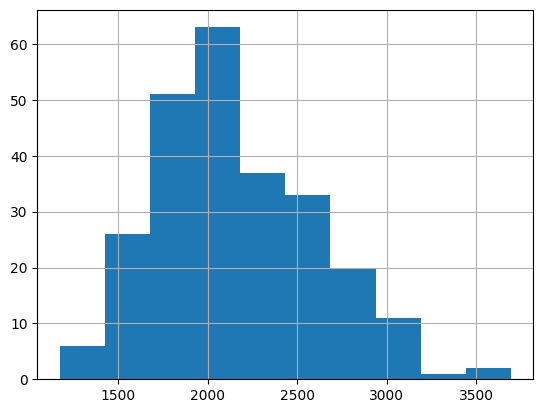

In [140]:
dfSimStats['finalportfoliovalue'].hist()

In [141]:
print(dfSimStats['firstdoubledperiod'].max())
print(dfSimStats['firstdoubledperiod'].min())

117.0
40.0


<Axes: >

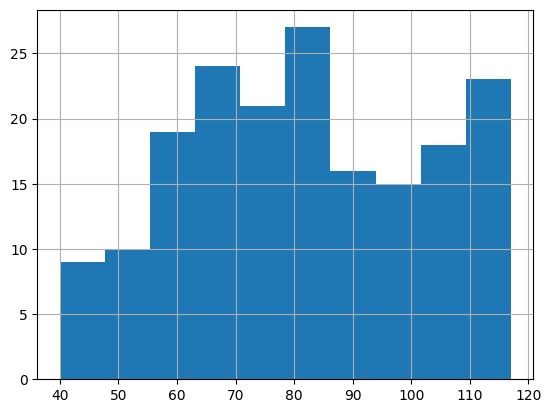

In [142]:
dfSimStats['firstdoubledperiod'].hist()

In [143]:
# df = calc_investmentperiod(120)
df = calc_simulation1(120, 250)
print(df.values.max())

5825.972975803993
